In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import pandas_profiling
import folium
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from folium.plugins import HeatMapWithTime
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv('/content/drive/My Drive/Safecity Reports - 28072019.csv')
data.shape

(12122, 9)

In [0]:
data.head()

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,More Info
0,12152,touching,27-05-2019 15:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My school auto driver always use to stare at m...,"Touching /Groping,",25.625485,85.055803,NaN
1,12149,whistling,17-05-2019 19:00,"Near Nissan Showroom, Bailey Rd, Patna, Bihar ...",I was in market with my mom. There I saw a man...,"Catcalls/Whistles,",25.619769,85.045596,NaN
2,12213,sexual invite,15-05-2019 15:03,"Makina, Nairobi, Kenya",there is a girl whom boys have been writing a ...,"Sexual Invites,",-1.308482,36.789595,NaN
3,12199,sexual invite,14-05-2019 14:13,"Makina, Nairobi, Kenya",there is a girl who is being disturbed y a bo...,"Sexual Invites,",-1.308482,36.789595,NaN
4,12206,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,NaN


In [0]:
data.drop_duplicates(['INCIDENT DATE','DESCRIPTION','LATITUDE', 'LONGITUDE'],inplace=True)
data.shape
#Removing outlier points
data.drop(data[(data.LATITUDE == 19.064169) & (data.LONGITUDE == 72.810536)].index,inplace=True)
data.drop(data[(data.LATITUDE == 19.105698999999998) & (data.LONGITUDE == 72.810536)].index,inplace=True)

In [0]:
data = data[((data.CATEGORY != 'Others, ') &( (data['INCIDENT TITLE'] != 'asking') | (data['INCIDENT TITLE'] != 'question'))) ]
data.shape

(10852, 9)

In [0]:
data = data[pd.notna(data['LONGITUDE'])]
data.shape

(10429, 9)

In [0]:
data['CATEGORY'].head()

0    Touching /Groping, 
1    Catcalls/Whistles, 
2       Sexual Invites, 
3       Sexual Invites, 
4       Sexual Invites, 
Name: CATEGORY, dtype: object

In [0]:
# # Cleaning CATEGORY column

# cats = []
# clean_cats = []
# for cat in (data['CATEGORY']):
#   cats.append("/".join([value.strip() for value in cat.split(',') if value != 'others']))

# for cat in cats:
#   clean_cats.append("/".join([value.strip() for value in cat.split('/')]))

# data.CATEGORY = clean_cats

In [0]:
!pip3 install --upgrade pandas
pd.__version__

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.1)


'0.25.1'

In [0]:
# Cleaning CATEGORY column

cats = []
clean_cats = []
for cat in (data['CATEGORY']):
  cats.append("/".join([value.strip() for value in cat.split(',') if value != 'others']))

for cat in cats:
  clean_cats.append([value.strip() for value in cat.split('/')])

data.CATEGORY = clean_cats

In [0]:
data = data.explode('CATEGORY')
data.shape

(40038, 9)

In [0]:
data.replace('','Not a category',inplace=True)
#data.drop(data[(data.CATEGORY == 'Not a category')].index,inplace=True)

In [0]:
#data.shape
data[(data.CATEGORY == 'Not a category')].index

Int64Index([    0,     1,     2,     3,     4,     9,    10,    11,    13,
               14,
            ...
            11681, 11682, 11683, 11684, 11685, 11686, 11687, 11688, 11689,
            11690],
           dtype='int64', length=10429)

In [0]:
data.head()

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,More Info
0,12152,touching,27-05-2019 15:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My school auto driver always use to stare at m...,Touching,25.625485,85.055803,NaN
0,12152,touching,27-05-2019 15:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My school auto driver always use to stare at m...,Groping,25.625485,85.055803,NaN
0,12152,touching,27-05-2019 15:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My school auto driver always use to stare at m...,Not a category,25.625485,85.055803,NaN
1,12149,whistling,17-05-2019 19:00,"Near Nissan Showroom, Bailey Rd, Patna, Bihar ...",I was in market with my mom. There I saw a man...,Catcalls,25.619769,85.045596,NaN
1,12149,whistling,17-05-2019 19:00,"Near Nissan Showroom, Bailey Rd, Patna, Bihar ...",I was in market with my mom. There I saw a man...,Whistles,25.619769,85.045596,NaN


In [0]:
data.drop(labels=['DESCRIPTION','INCIDENT TITLE','More Info'],inplace=True,axis=1)

In [0]:
# pandas_profiling.ProfileReport(data[['CATEGORY']])

In [0]:
data['INCIDENT DATE']= pd.to_datetime(data['INCIDENT DATE'])

In [0]:
def generateBaseMap(default_location=[19.0760, 72.8777], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [0]:
def calculate_clusters_kmeans (data,no_of_clusters):
  coordinates = data[['LATITUDE','LONGITUDE']].values
  kmeans = KMeans(no_of_clusters).fit(coordinates)
  return (kmeans.labels_,kmeans.cluster_centers_)

In [0]:
#(18.90,72.800),(18.95,72.825)
#distance in KM = 6 KM
# Euclidean distance = 0.055902
0.055902/6
# 1KM distance for Dbscan is

0.009317

In [0]:
from sklearn.cluster import DBSCAN
def calculate_clusters_dbscan (data,min_distance = 1,min_samples = 5):
  coordinates = data[['LATITUDE','LONGITUDE']].values
  dbscan = DBSCAN(eps = (0.009317/min_distance),min_samples=min_samples).fit(coordinates)
  return dbscan.labels_

In [0]:
#Heat map

def Heat_map(frame,lat_border = (18.893957, 19.270177),log_border = (72.776333, 72.979731)):
    city_long_border = log_border
    city_lat_border = lat_border
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.LONGITUDE.values, frame.LATITUDE.values, s=10, lw=0,
               c=frame.cluster_label.values, cmap='tab20', alpha=1)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

In [0]:
data.drop(data[(data.LATITUDE == 19.064169) & (data.LONGITUDE == 72.810536)].index,inplace=True)
data.drop(data[(data.LATITUDE == 19.105698999999998) & (data.LONGITUDE == 72.810536)].index,inplace=True)

In [0]:
from math import radians, cos, sin, asin, sqrt,inf

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [0]:
import math
def inter_cluster_distance (data,cluster_labels,which_label = 1):
  maximum_distance = {}
  minimum_distance = {}
  if which_label == 1:
    label = 'cluster_label'
  else:
    label = 'secondary_cluster_label'

  for i in list(set(cluster_labels)):
    lat_log_list = []
    if i != -1:
      tmp = data[data[label] == i]
      max = -math.inf
      min = math.inf
      for index,row in tmp.iterrows():
        lat_log_list.append((row['LONGITUDE'],row['LATITUDE']))
      for location in lat_log_list:
        every_other_location = lat_log_list[:]
        every_other_location.remove(location)
        for other_location in every_other_location:
          distance = haversine(location[0],location[1],other_location[0],other_location[1])
          if distance > max:
            max = distance
          if distance < min:
            min = distance
        maximum_distance[i] = max
        minimum_distance[i] = min
  return(maximum_distance,minimum_distance)


In [0]:
def category_count (series):
  cat_count = {}
  for categories in series.tolist():
    cats = categories.split('/')
    for value in cats:
      if value in cat_count:
        cat_count[value] += 1
      else:
        cat_count[value] = 1
  return ' <br> '.join((str(cat_count).replace('{','').replace('}','')).split(',')) # Coverting dict into str and formatting


In [0]:
def cluster_radius (series,*args):
  for arg in args:
    print(args)
  #final_dataframe  = args[0]
  label = series.iloc[0]
  tmp = final_dataframe[final_dataframe.secondary_cluster_label == label]
  if label < 100:
    max_dist,_ = inter_cluster_distance(tmp,tmp.cluster_label.to_list())
  else:
    max_dist,_ = inter_cluster_distance(tmp,tmp.secondary_cluster_label.to_list(),2)
  return max_dist[label]

In [0]:
def color_producer(elevation):
    if elevation < 10:
        return 'green'
    elif 10 <= elevation < 30:
        return 'yellow'
    elif 30 <= elevation < 50:
        return 'orange'
    else:
        return 'red'

In [0]:
def describe (data,city_lat,city_log):
      cluster_labels = calculate_clusters_dbscan(data,1,5)
      data['cluster_label'] = cluster_labels
      print("Heat map for clusttering by DBSCAN for Mumbai")
      Heat_map(data,city_lat,city_log)



      print('\n\nClusttering summry of DBSCAN for Mumbai\n\n')
      print('Total data : ', data.shape)
      for i in list(set(cluster_labels)):
        print((data[data.cluster_label == i]).shape,end = ' ')
        if i%10 == 0:
          print()
      print()
      print('Outlier data ' ,(data[data.cluster_label == -1]).shape)



      print('\n\n Inter Cluster Distance \n\n')
      maximum_distance,_ = inter_cluster_distance(data,cluster_labels)
      for i,label in enumerate(maximum_distance):
        print(label,':',maximum_distance[label],end = ' | ')
        if i%5 == 0:
          print()



      print('\n\n Making cluster more granular with Kmeans \n\n')
      final_dataframe = pd.DataFrame(columns = data.columns.append(pd.Index(['secondary_labels'])))
      maximum_distance,_ = inter_cluster_distance(data,cluster_labels)
      second_level_clustering = []
      for i,label in enumerate(maximum_distance):
        if maximum_distance[label] > 0.5 :
          tmp = data[data.cluster_label == label]
          secondry_labels,cluster_centers = calculate_clusters_kmeans(tmp,int(maximum_distance[label]/0.5))
          tmp['secondary_cluster_label'] = (secondry_labels+(100*(i+1)))
          final_dataframe = final_dataframe.append(tmp)
        else:
          tmp = data[data.cluster_label == label]
          tmp['secondary_cluster_label'] = label
          final_dataframe = final_dataframe.append(tmp)

      final_dataframe['no_of_crimes'] = 1  #For counting number of crimes in cluster
      final_dataframe['cluster_radius'] = final_dataframe['secondary_cluster_label']  # Taking cluster label as reference to calculate cluster radius
      def cluster_radius (series):
        label = series.iloc[0]
        tmp = final_dataframe[final_dataframe.secondary_cluster_label == label]
        if label < 100:
          max_dist,_ = inter_cluster_distance(tmp,tmp.cluster_label.to_list())
        else:
          max_dist,_ = inter_cluster_distance(tmp,tmp.secondary_cluster_label.to_list(),2)
        return max_dist[label]
      # calculating cluster centers by Aggregation
      statistics = final_dataframe.groupby('secondary_cluster_label').agg({'LATITUDE':'mean','LONGITUDE':'mean','CATEGORY':category_count,'cluster_radius' : cluster_radius,'no_of_crimes':'count'})

      #clusters with only 1 point has cluster_radius = -inf
      #mapping this point to a small value

      statistics.replace(-inf,0,inplace=True)	

      # Ploting cluster circle on map.
      m1 = folium.Map(location=(19.0760, 72.8777), zoom_start=12,tiles='CartoDBPositron',prefer_canvas = True)
      fg = folium.FeatureGroup(name="My Map")
      for crime_center in statistics.iterrows():
        crime_center = crime_center[1]
        fg.add_child(folium.CircleMarker(location=[crime_center.LATITUDE,crime_center.LONGITUDE], radius=(crime_center.cluster_radius)+6,
                    tooltip =str(str(crime_center.no_of_crimes)+' crimes happend at this location within the radius of '+"%.2f" %(crime_center.cluster_radius)+' KM.<br> With follwing categories<br>'+crime_center.CATEGORY),
                    fill_color=color_producer(crime_center.no_of_crimes),fill_opacity=0.7, fill=True))
      m1.add_child(fg)
      m1.save('/content/drive/My Drive/cluster_centers.html')
      return m1

In [0]:
mumbai_data = data[((data.LATITUDE >= 18.893957) & (data.LATITUDE <= 19.270177)) & ((data.LONGITUDE >= 72.776333) & (data.LONGITUDE <= 72.979731))]

Heat map for clusttering by DBSCAN for Mumbai


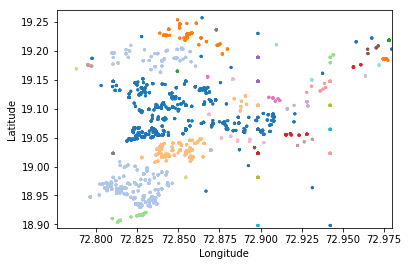



Clusttering summry of DBSCAN for Mumbai


Total data :  (7186, 7)
(2706, 7) 
(463, 7) (1403, 7) (244, 7) (130, 7) (459, 7) (124, 7) (861, 7) (32, 7) (5, 7) (102, 7) 
(17, 7) (53, 7) (19, 7) (87, 7) (20, 7) (40, 7) (24, 7) (15, 7) (12, 7) (30, 7) 
(7, 7) (13, 7) (13, 7) (9, 7) (17, 7) (8, 7) (9, 7) (35, 7) (36, 7) (17, 7) 
(9, 7) (12, 7) (6, 7) (17, 7) (15, 7) (21, 7) (7, 7) (12, 7) (5, 7) (6, 7) 
(5, 7) (10, 7) (51, 7) 
Outlier data  (51, 7)


 Inter Cluster Distance 


0 : 10.695355280358323 | 
1 : 7.022957699042322 | 2 : 8.838624952137167 | 3 : 5.897555744941999 | 4 : 0.3943941625343251 | 5 : 7.164179830862695 | 
6 : 2.9434263819834716 | 7 : 5.351884457306698 | 8 : 0.0 | 9 : 0.0 | 10 : 2.6060809148075212 | 
11 : 1.5107173996966738 | 12 : 1.336588445098669 | 13 : 0.672719829680527 | 14 : 0.0 | 15 : 0.0 | 
16 : 2.5941101580231036 | 17 : 0.0 | 18 : 0.0 | 19 : 0.0 | 20 : 1.8477144451776153 | 
21 : 0.0 | 22 : 1.6090983247259687 | 23 : 0.3442905532099073 | 24 : 1.518900099082698 | 25 : 0

In [0]:
describe(mumbai_data,(18.893957, 19.270177),(72.776333, 72.979731))

In [0]:
delhi_data = data[((data.LATITUDE >= 28.4046) & (data.LATITUDE <= 28.8834)) & ((data.LONGITUDE >= 76.8388) & (data.LONGITUDE <= 77.3463))]
lat_border = (28.4046,28.8834)
log_border = (76.8388,77.3463)

Heat map for clusttering by DBSCAN for Mumbai


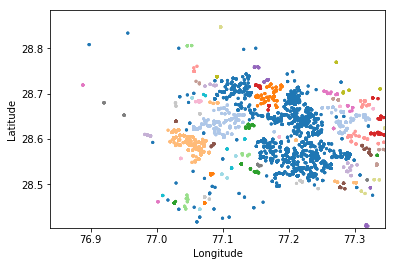



Clusttering summry of DBSCAN for Mumbai


Total data :  (15935, 7)
(9079, 7) 
(5, 7) (543, 7) (5, 7) (291, 7) (5, 7) (1238, 7) (102, 7) (29, 7) (22, 7) (277, 7) 
(47, 7) (21, 7) (2090, 7) (19, 7) (15, 7) (29, 7) (10, 7) (67, 7) (66, 7) (37, 7) 
(116, 7) (13, 7) (14, 7) (13, 7) (20, 7) (13, 7) (48, 7) (15, 7) (26, 7) (34, 7) 
(57, 7) (84, 7) (81, 7) (21, 7) (35, 7) (13, 7) (18, 7) (10, 7) (44, 7) (26, 7) 
(21, 7) (43, 7) (10, 7) (5, 7) (38, 7) (27, 7) (25, 7) (103, 7) (31, 7) (53, 7) 
(68, 7) (9, 7) (15, 7) (37, 7) (7, 7) (6, 7) (29, 7) (29, 7) (45, 7) (7, 7) 
(11, 7) (34, 7) (15, 7) (7, 7) (5, 7) (9, 7) (8, 7) (22, 7) (11, 7) (17, 7) 
(5, 7) (44, 7) (14, 7) (125, 7) (14, 7) (7, 7) (7, 7) (5, 7) (12, 7) (12, 7) 
(7, 7) (11, 7) (6, 7) (5, 7) (14, 7) (9, 7) (7, 7) (9, 7) (6, 7) (12, 7) 
(11, 7) (7, 7) (141, 7) 
Outlier data  (141, 7)


 Inter Cluster Distance 


0 : 24.421256143789165 | 
1 : 0.15393315548379835 | 2 : 7.644606044779404 | 3 : 0.48219559150513097 | 4 : 5.875557354422314 | 

In [0]:
describe(delhi_data,lat_border,log_border)